# 2) Data Wrangling II 
Create an “Academic performance” dataset of students and perform the following operations using 
Python. 
 
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or 
inconsistencies, use any of the suitable techniques to deal with them. 
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques 
to deal with them. 
3. Apply data transformations on at least one of the variables. The purpose of this 
transformation should be one of the following reasons: to change the scale for better 
understanding of the variable, to convert a non-linear relation into a linear one, or to decrease 
the skewness and convert the distribution into a normal distribution.

In [1]:
# Create an “Academic performance” dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = { 'Student_Id':[1,2,3,4,5,6,7,8],
        'Name':['sonu','monu','panu','riya','gayu','aradhya','aditi','mayra'],
        'Age':[22,17,None,21,18,10,14,15],
        'Grade':[60,70,77,65,None,88,70,None],
        'Attendance':[90,89,45,67,80,99,56,75]
       }

In [4]:
df=pd.DataFrame(data)

In [5]:
df

,Student_Id,Name,Age,Grade,Attendance
0,1,sonu,22.0,60.0,90
1,2,monu,17.0,70.0,89
2,3,panu,NaN,77.0,45
3,4,riya,21.0,65.0,67
4,5,gayu,18.0,NaN,80
5,6,aradhya,10.0,88.0,99
6,7,aditi,14.0,70.0,56
7,8,mayra,15.0,NaN,75


In [6]:
# missing values and inconsistencies

In [7]:
missing_values = df.isnull().sum()

In [8]:
missing_values

Student_Id    0
Name          0
Age           1
Grade         2
Attendance    0
dtype: int64

In [9]:
inconsistent_age = df[(df['Age']<10) | (df['Age']>20)]

In [10]:
inconsistent_age

,Student_Id,Name,Age,Grade,Attendance
0,1,sonu,22.0,60.0,90
3,4,riya,21.0,65.0,67


In [11]:
df['Grade'].fillna(df['Grade'].median(),inplace=True)

In [12]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [13]:
df

,Student_Id,Name,Age,Grade,Attendance
0,1,sonu,22.0,60.0,90
1,2,monu,17.0,70.0,89
2,3,panu,17.0,77.0,45
3,4,riya,21.0,65.0,67
4,5,gayu,18.0,70.0,80
5,6,aradhya,10.0,88.0,99
6,7,aditi,14.0,70.0,56
7,8,mayra,15.0,70.0,75


{'whiskers': [<matplotlib.lines.Line2D at 0x1f298564290>,
 'caps': [<matplotlib.lines.Line2D at 0x1f298565f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f29855b710>],
 'medians': [<matplotlib.lines.Line2D at 0x1f298567710>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f298574310>],
 'means': []}

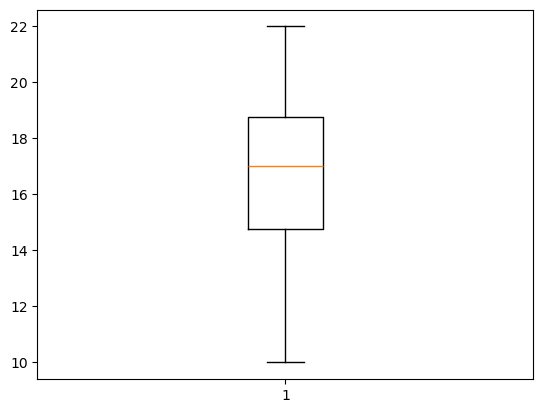

In [14]:
plt.boxplot(x='Age',data=df)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f298610090>,
 'caps': [<matplotlib.lines.Line2D at 0x1f298611690>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f2985ff5d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f298612c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f2986136d0>],
 'means': []}

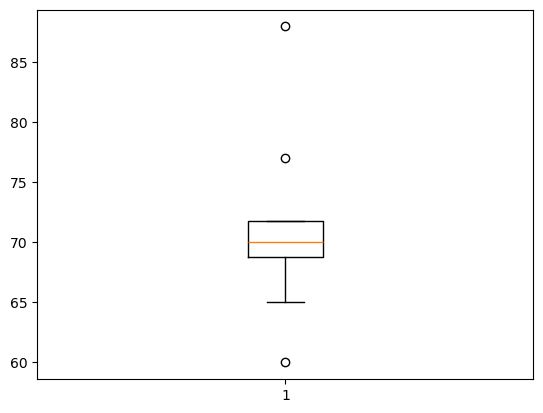

In [15]:
plt.boxplot(x='Grade',data=df)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f298674710>,
 'caps': [<matplotlib.lines.Line2D at 0x1f298675dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f29866bc90>],
 'medians': [<matplotlib.lines.Line2D at 0x1f298677310>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f298677d90>],
 'means': []}

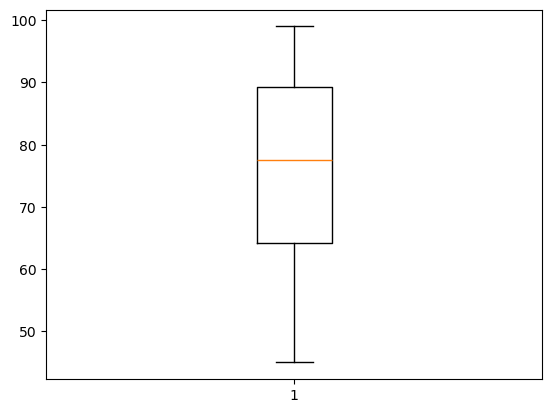

In [16]:
plt.boxplot(x='Attendance',data=df)

In [17]:
def Remove_outliers(column):
    Q1= column.quantile(0.25)
    Q3=column.quantile(0.75)
    IQR = Q3-Q1
    Lower_Bound=Q1 - 1.5*IQR
    Upper_Bound=Q3 + 1.5*IQR
    return column[(column>=Lower_Bound)&(column<=Upper_Bound)]


In [18]:
df['Attendance']=Remove_outliers(df['Attendance'])

In [25]:
df['Attendance']

0    90
1    89
2    45
3    67
4    80
5    99
6    56
7    75
Name: Attendance, dtype: int64

In [26]:
df['Age']=Remove_outliers(df['Age'])

In [27]:
df['Age']

0    22.0
1    17.0
2    17.0
3    21.0
4    18.0
5    10.0
6    14.0
7    15.0
Name: Age, dtype: float64

In [28]:
df['Grade']=Remove_outliers(df['Grade'])

In [29]:
df['Grade']

0     NaN
1    70.0
2     NaN
3     NaN
4    70.0
5     NaN
6    70.0
7    70.0
Name: Grade, dtype: float64

In [21]:
# Apply data transformations

In [22]:
df['Age_sqrt']=np.sqrt(df['Age'])

In [24]:
df['Age_sqrt']

0    4.690416
1    4.123106
2    4.123106
3    4.582576
4    4.242641
5    3.162278
6    3.741657
7    3.872983
Name: Age_sqrt, dtype: float64